<a href="https://colab.research.google.com/github/anjelisa01/house-price-pred/blob/main/old-notebook-houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

Data yang digunakan berasal dari kompetisi yang di-host oleh Kaggle berjudul 'House Prices - Advanced Regression Techniques'<br>
Berikut link sumber data: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


Data yang didapatkan terdiri dari 4 file, data train dan data test, data description dan file contoh submission. Data yang akan digunakan untuk train model adalah train.csv

# Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Check data

##Import data

In [ ]:
ori_price=pd.read_csv('train.csv')
ori_price.shape

(1460, 81)

test api below

In [ ]:
testbgt=ori_price.dropna()
testbgt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


##Full data

In [ ]:
ori_price.iloc[:,1:21].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000


In [ ]:
ori_price.iloc[:,21:41].head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex
1,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex
3,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex


In [ ]:
ori_price.iloc[:,41:61].head()

,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish
0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn
1,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn
2,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn
3,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf
4,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn


In [ ]:
ori_price.iloc[:,61:81].head()

,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Info and description of data

In [ ]:
ori_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
ori_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Data Cleaning

In [ ]:
#keeping the original data
price=ori_price.copy()

#Outlier

checking outlier from the target data

<Axes: xlabel='SalePrice', ylabel='Count'>

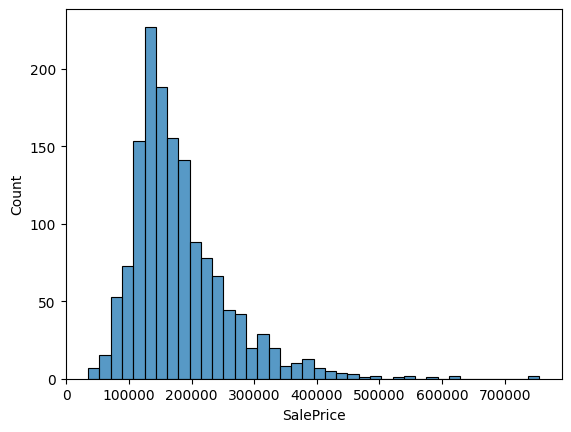

In [ ]:
sns.histplot(price['SalePrice'],bins=40)

##Null data

In [ ]:
#untuk melihat persentase missing value
missing=price.isnull().sum()
missing=missing[missing!=0]
missing.apply(lambda x: (x/len(price))*100).sort_values()

,0
Electrical,0.068493
MasVnrArea,0.547945
BsmtCond,2.534247
BsmtFinType1,2.534247
BsmtQual,2.534247
BsmtExposure,2.602740
BsmtFinType2,2.602740
GarageType,5.547945
GarageQual,5.547945
GarageFinish,5.547945


Akan dicek satu satu dan handle masing masing

###Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Fillna = NONE

In [ ]:
price['Alley']=price['Alley'].fillna(value='NONE')

###PoolQC

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


Fillna = NONE

In [ ]:
price['PoolQC']=price['PoolQC'].fillna(value='NONE')

###Fence

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [ ]:
price['Fence']=price['Fence'].fillna(value='NONE')

###MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [ ]:
price['MiscFeature']=price['MiscFeature'].fillna(value='NONE')

###MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

fillna=NONE

In [ ]:
price['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
price['MasVnrType']=price['MasVnrType'].fillna(value='NONE')

### MasVnrArea

In [ ]:
price['MasVnrArea']

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0
...,...
1455,0.0
1456,119.0
1457,0.0
1458,0.0


same as basement, MasVnrArea harus 0 kalo si MasVnrType is NONE, lets check

MasVnrArea: Masonry veneer area in square feet


In [ ]:
missmatchMasVnr=price[['MasVnrType','MasVnrArea']][(price['MasVnrType']=='NONE')!=(price['MasVnrArea']==0)]
missmatchMasVnr

,MasVnrType,MasVnrArea
234,NONE,NaN
529,NONE,NaN
624,NONE,288.0
650,NONE,NaN
688,BrkFace,0.0
773,NONE,1.0
936,NONE,NaN
973,NONE,NaN
977,NONE,NaN
1230,NONE,1.0


In [ ]:
missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea'].isnull())]

,MasVnrType,MasVnrArea
234,NONE,NaN
529,NONE,NaN
650,NONE,NaN
936,NONE,NaN
973,NONE,NaN
977,NONE,NaN
1243,NONE,NaN
1278,NONE,NaN


In [ ]:
price['MasVnrArea'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea'].isnull())].index]=0

<ipython-input-21-abd430f0ba5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['MasVnrArea'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea'].isnull())].index]=0


Handling missing value MasVnrArea done, di bawah ini untuk miss match value

In [ ]:
missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']<10)]

,MasVnrType,MasVnrArea
773,NONE,1.0
1230,NONE,1.0


In [ ]:
price['MasVnrArea'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']<10)].index]=0

<ipython-input-23-cdd5c3fe5128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['MasVnrArea'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']<10)].index]=0


In [ ]:
missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']>10)]

,MasVnrType,MasVnrArea
624,NONE,288.0
1300,NONE,344.0
1334,NONE,312.0


In [ ]:
price['MasVnrType'].value_counts()[:4]

,count
MasVnrType,
NONE,872
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
price['MasVnrType'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']>10)].index]='BrkFace'

<ipython-input-26-721108e788cc>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['MasVnrType'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']=='NONE')&(missmatchMasVnr['MasVnrArea']>10)].index]='BrkFace'
<ipython-input-26-721108e7

In [ ]:
missmatchMasVnr[(missmatchMasVnr['MasVnrType']!='NONE')&(missmatchMasVnr['MasVnrArea']==0)]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [ ]:
price['MasVnrType'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']!='NONE')&(missmatchMasVnr['MasVnrArea']==0)].index]='NONE'

<ipython-input-28-f14b42748bdd>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['MasVnrType'].iloc[missmatchMasVnr[(missmatchMasVnr['MasVnrType']!='NONE')&(missmatchMasVnr['MasVnrArea']==0)].index]='NONE'
<ipython-input-28-f14b42748bd

In [ ]:
# yang NONE-NAN kasih tinggal nanti diimput 0

# yang NONE-Value(not outlier) imputer=Most Frequent

# yang NONE-Value(outlier) imputer=value 0

# yang Value-0 imputer untuk type=Type area=0

In [ ]:
price['MasVnrArea'].describe()

,MasVnrArea
count,1460.000000
mean,103.115753
std,180.732152
min,0.000000
25%,0.000000
50%,0.000000
75%,164.250000
max,1600.000000


In [ ]:
price['MasVnrArea'][(price['MasVnrArea']>0)&(price['MasVnrArea']<10)]

,MasVnrArea


sepertinya ada outlier, rata rata masvnr area itu 100an tapi ada yg cuman 1 doang

###FireplaceQu     

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [ ]:
price['FireplaceQu']=price['FireplaceQu'].fillna(value='NONE')

###LotFrontage

LotFrontage: Linear feet of street connected to property


In [ ]:
price['LotFrontage'].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


fillna=MEAN

In [ ]:
price['LotFrontage']=price['LotFrontage'].fillna(price['LotFrontage'].mean())

###Garage

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageYrBlt: Year garage was built


In [ ]:
price['GarageYrBlt']

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1455,1999.0
1456,1978.0
1457,1941.0
1458,1950.0


In [ ]:
price['GarageYrBlt'].min()

1900.0

persentase null value nya sama semua jadi sepertinya data itu itu aja yg missing,JADI:<br>
Semua kecuali garage yr built: NONE<br>
garageyrbuilt :  value 0, karena konteksnya ga ada garage jadi 0 karena ga ada tahun.

In [ ]:
price['GarageType']=price['GarageType'].fillna(value='NONE')
price['GarageFinish']=price['GarageFinish'].fillna(value='NONE')
price['GarageQual']=price['GarageQual'].fillna(value='NONE')
price['GarageCond']=price['GarageCond'].fillna(value='NONE')

In [ ]:
price['GarageYrBlt']=price['GarageYrBlt'].fillna(0)

###Basement

persetase basement beda...semua feature ini keterangannya NA=NONE,tapi ada inkonsistensi data, ada missmatch, kalau bener seharunya persentase missing value nya sama.

aku mau anchor ke fature yang kelebihan itu,bsmtexposure danbsmtfintyype2, type 2 ini refre kalo sirumah punya lebih dari 1 basemen finished area, tapi kalo tyepe 2 ada berati type 1 harusada juga.<br>
**ABORT** well kebalik wkwkwk

In [ ]:
#semua null data dari bsmtexposure
price[['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2']][(price['BsmtExposure'].isnull())| (price['BsmtFinType2'].isnull())]#.loc[332,:]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,Gd,TA,GLQ,No,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


Berarti index 332 ini cuman punya 1 finish type basement,jadi imputernya = NONE walau ini menunjukan kalo g ada basement tapi untuk buat 1 kategorilagi kayaknya berlebihan orang cuman 1 row aja

Untuk indek 948, karena row ini ada 4 feature yang menunjukan kalo ada basement,maka imputernya="No"

Mau impute 2 missmatch data ini dulu

In [ ]:
price['BsmtExposure'].iloc[948]='No'

<ipython-input-40-c5b58effd2ec>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['BsmtExposure'].iloc[948]='No'
<ipython-input-40-c5b58effd2ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
price['BsmtFinType2'].iloc[332]='NONE'

<ipython-input-41-0814bb2dce84>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['BsmtFinType2'].iloc[332]='NONE'
<ipython-input-41-0814bb2dce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
#Fillna semua dengan NONE
price['BsmtQual']=price['BsmtQual'].fillna(value='NONE')
price['BsmtCond']=price['BsmtCond'].fillna(value='NONE')
price['BsmtFinType1']=price['BsmtFinType1'].fillna(value='NONE')
price['BsmtExposure']=price['BsmtExposure'].fillna(value='NONE')
price['BsmtFinType2']=price['BsmtFinType2'].fillna(value='NONE')

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

###Electrical

In [ ]:
price['Electrical'].head()

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr


In [ ]:
price['Electrical'].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
price['Electrical']=price['Electrical'].fillna(value='SBrkr')

DONE HANDLING MISSING SAMA BEBERAPA DATA MISS MATCH dan juga BEBERAPA OUTLIER


---



#EDA

In [ ]:
price.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
#function cari feature dengan nama yang sama
def groupingnama(nama1,nama2='None',nama3='None',nama4='None',nama5='None'):
  cari = nama1+'|'+nama2+'|'+nama3+'|'+nama4+'|'+nama5
  return price.filter(regex=cari)



### Quality dan condition

In [ ]:
groupingnama('Qual','QC','Cond').head()

,Condition1,Condition2,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,LowQualFinSF,KitchenQual,GarageQual,GarageCond,PoolQC,SaleCondition
0,Norm,Norm,7,5,Gd,TA,Gd,TA,Ex,0,Gd,TA,TA,NONE,Normal
1,Feedr,Norm,6,8,TA,TA,Gd,TA,Ex,0,TA,TA,TA,NONE,Normal
2,Norm,Norm,7,5,Gd,TA,Gd,TA,Ex,0,Gd,TA,TA,NONE,Normal
3,Norm,Norm,7,5,TA,TA,TA,Gd,Gd,0,Gd,TA,TA,NONE,Abnorml
4,Norm,Norm,8,5,Gd,TA,Gd,TA,Ex,0,Gd,TA,TA,NONE,Normal


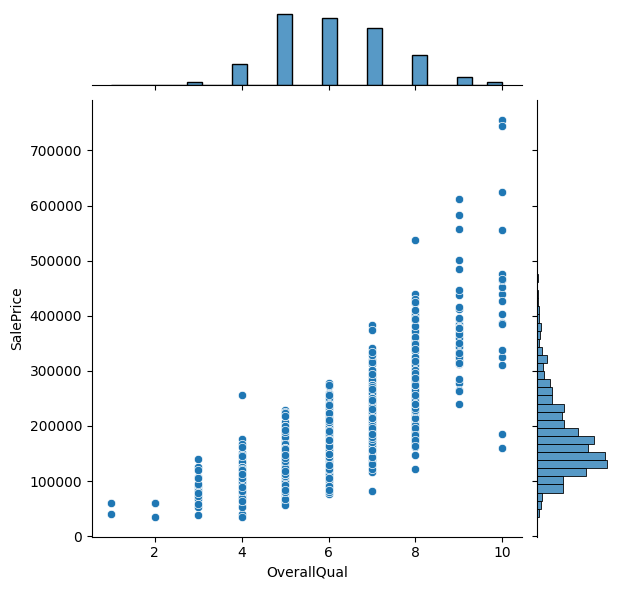

In [ ]:
sns.jointplot(x=price['OverallQual'],y=price['SalePrice'])

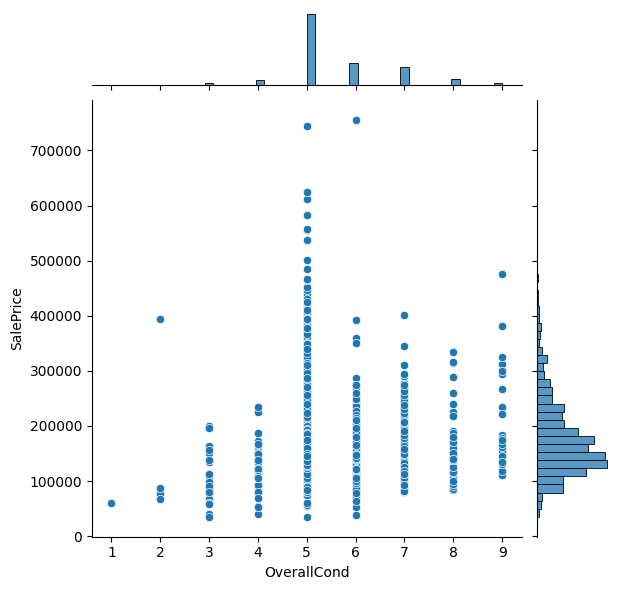

In [ ]:
sns.jointplot(x=price['OverallCond'],y=price['SalePrice'])

## Explorasi deck dan porch

In [ ]:
groupingnama('Deck','Porch').head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,61,0,0,0
1,298,0,0,0,0
2,0,42,0,0,0
3,0,35,272,0,0
4,192,84,0,0,0


Tentang Deck: cuman 1, jadi pake ini aja untuk dilihat SF nya<br>
Porch: pake ini-> OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch (smeuanya menyatakan luas porch dlm SF)

## Dimensi Rumah

Berkaitan sama luas tanah, besar ruangan, dst

In [ ]:
groupingnama('SF','Area','Frontage').head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0


In [ ]:
price['BuildingSF']=price['TotalBsmtSF']+price['GrLivArea']+price['GarageArea']+price['WoodDeckSF']+price['OpenPorchSF']+ price['EnclosedPorch']	+price['3SsnPorch']	+ price['ScreenPorch']+price['PoolArea']

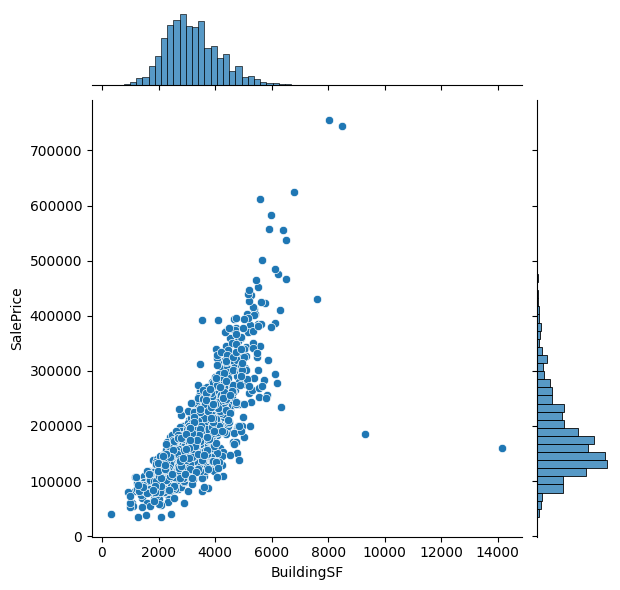

In [ ]:
sns.jointplot(x=price['BuildingSF'], y=price['SalePrice'])

korelasi sangat tinggi

##Umur rumah

In [ ]:
groupingnama('Year','Yr').head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [ ]:
price[['YearBuilt','YrSold']].head()

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008


In [ ]:
price['HouseAge']=price['YrSold']-price['YearBuilt']

###Bin umur rumah

In [ ]:
price['HouseAge'].unique()

array([  5,  31,   7,  91,   8,  16,   3,  36,  77,  69,  43,   1,  46,
        48,  78,  40,  39,   4,  51,   6,  42,   2,  59,  49,  81,  88,
        15,  55,  57,  53,  41,  24,  33,  47,  89,  10,  72,  25,  52,
        44,   0,  87,  12,  65,  34,  11,  56,  95,  60,  99,  14,  94,
        13,  45,  97,  90,  30,  76, 122,  54,  62,  20,  37,  68,  50,
        71,   9,  38,  18,  58,  70,  32,  35,  83,  84,  66,  19,  22,
        86,  98, 114,  93,  75,  82,  17, 106,  29,  96,  27,  92, 128,
        61,  67,  21,  26, 108,  28,  63,  73,  74,  80, 115, 126, 102,
        85,  23, 110, 117, 129,  64, 100, 111, 104, 119, 127, 107, 135,
       109, 136, 103,  79, 125])

In [ ]:
bins=[0,10,20,50,100,float('inf')]
labels=['New','Recent','Middle-aged','Old','Historic']

In [ ]:
price['HouseBin']=pd.cut(price['HouseAge'],bins=bins,labels=labels)

<Axes: xlabel='HouseBin', ylabel='SalePrice'>

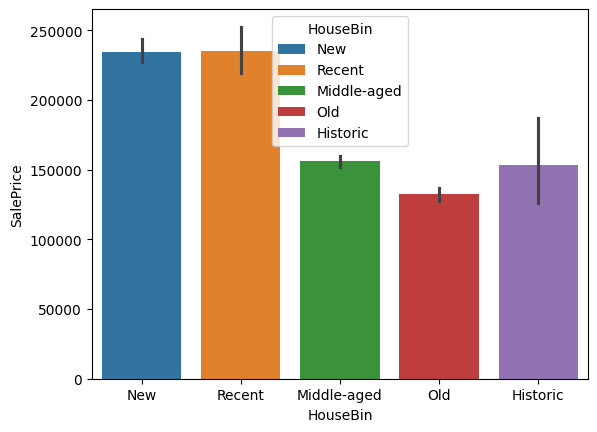

In [ ]:
sns.barplot(x=price['HouseBin'],y=price['SalePrice'],hue=price['HouseBin'])

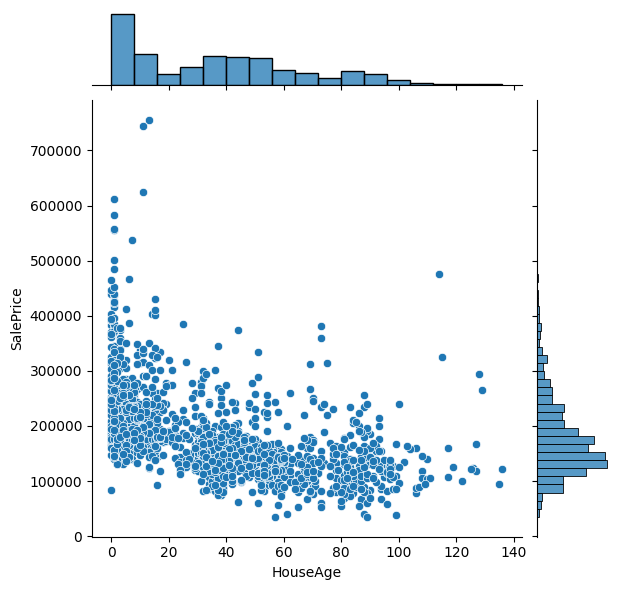

In [ ]:
sns.jointplot(x=price['HouseAge'],y=price['SalePrice'])

In [ ]:
price['HouseAge']

,HouseAge
0,5
1,31
2,7
3,91
4,8
...,...
1455,8
1456,32
1457,69
1458,60


##Remodel

In [ ]:
groupingnama('Remod','Mod','mod').head()

,YearRemodAdd
0,2003
1,1976
2,2002
3,1970
4,2000


In [ ]:
price['RemodYrSold']=price['YrSold']-price['YearRemodAdd']

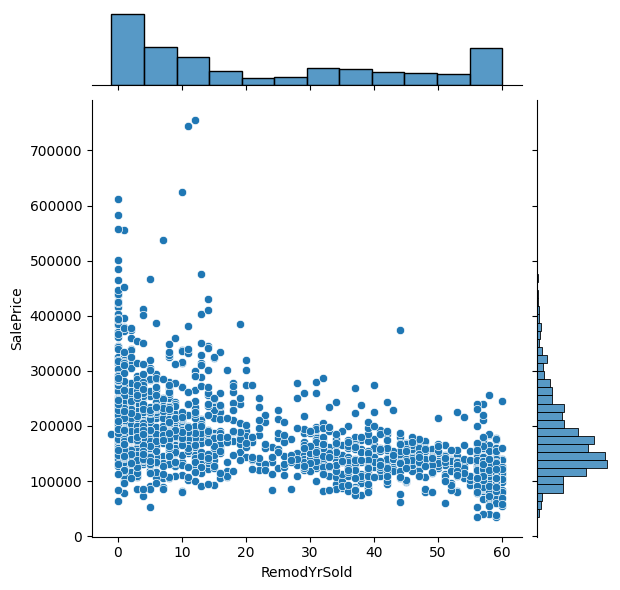

In [ ]:
sns.jointplot(x=price['RemodYrSold'],y=price['SalePrice'])

##OverallQual x GrLivArea

In [ ]:
price['QualGrLiv']=price['GrLivArea']*price['OverallQual']

## Ratioi jumlah kamar terhadap total ruang

In [ ]:
groupingnama('room','Room','Rms')

,BedroomAbvGr,TotRmsAbvGrd
0,3,8
1,3,6
2,3,6
3,3,7
4,4,9
...,...,...
1455,3,7
1456,3,7
1457,4,9
1458,2,5


In [ ]:
price['RatioBedroom']=price['BedroomAbvGr']/price['TotRmsAbvGrd']

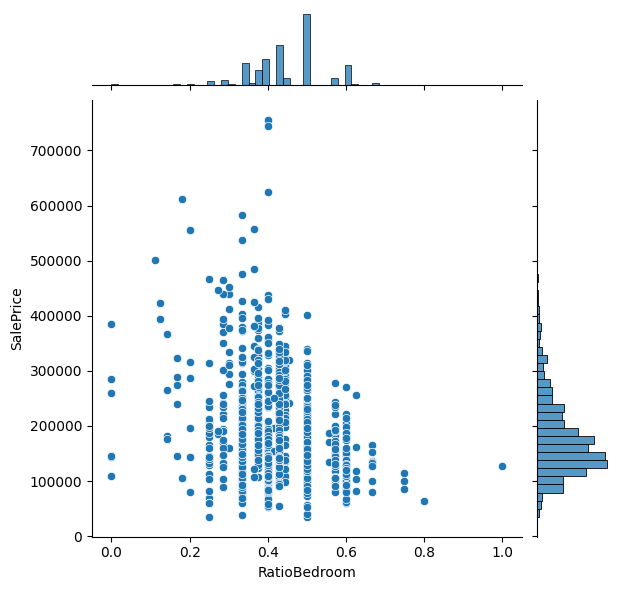

In [ ]:
sns.jointplot(x=price['RatioBedroom'],y=price['SalePrice'])

##Cross Feature (categorical)

###Neighborhood HouseStyle

In [ ]:
price['Neighborhood_HouseStyle']=price['Neighborhood']+'_'+price['HouseStyle']

In [ ]:
len(price['Neighborhood_HouseStyle'].unique())

96

Rata-rata harga rumah dengan neighborhood dan house style spesifik

In [ ]:
neighborhood_housestyle_mean=price['SalePrice'].groupby(price['Neighborhood_HouseStyle']).mean().sort_values()
neighborhood_housestyle_mean

,SalePrice
Neighborhood_HouseStyle,
SWISU_1Story,75500.000000
SawyerW_1.5Unf,76000.000000
MeadowV_SFoyer,83166.666667
IDOTRR_1Story,85077.230769
IDOTRR_2Story,89400.000000
...,...
NoRidge_2Story,332779.030303
NridgHt_2Story,338783.269231
NoRidge_1Story,345066.666667


Neighborhood mana dengan type rumah apa yang punya harga rumah terendah dan tertinggi.

In [ ]:
neighborhood_housestyle_mean[:5]

,SalePrice
Neighborhood_HouseStyle,
SWISU_1Story,75500.000000
SawyerW_1.5Unf,76000.000000
MeadowV_SFoyer,83166.666667
IDOTRR_1Story,85077.230769
IDOTRR_2Story,89400.000000


In [ ]:
neighborhood_housestyle_mean[-5:]

,SalePrice
Neighborhood_HouseStyle,
NoRidge_2Story,332779.030303
NridgHt_2Story,338783.269231
NoRidge_1Story,345066.666667
NoRidge_1.5Fin,347500.000000
StoneBr_2Story,380968.571429


In [ ]:
neighborhood_housestyle_mean[neighborhood_housestyle_mean<100000]

,SalePrice
Neighborhood_HouseStyle,
SWISU_1Story,75500.000000
SawyerW_1.5Unf,76000.000000
MeadowV_SFoyer,83166.666667
IDOTRR_1Story,85077.230769
IDOTRR_2Story,89400.000000
BrkSide_1Story,89985.000000
MeadowV_SLvl,91000.000000
OldTown_1.5Unf,95100.000000
Crawfor_1.5Unf,96500.000000


In [ ]:
neighborhood_housestyle_mean[neighborhood_housestyle_mean>300000]

,SalePrice
Neighborhood_HouseStyle,
NridgHt_1Story,304793.588235
SawyerW_1.5Fin,316600.000000
NoRidge_2Story,332779.030303
NridgHt_2Story,338783.269231
NoRidge_1Story,345066.666667
NoRidge_1.5Fin,347500.000000
StoneBr_2Story,380968.571429


Kesimpulannya, rumah di perumahan NorthRidge baik di north dan high, Sawyer dan stone brooke dengan house style apapun kecuali unfinished, punya harga rata-rata di atas 300000 USD, alias perumahan elit, di sawyer ada rumah yg kalo 1.5 unf harganya 75000 USD.

Diperumahan Sawyer, berapa range harga rumah?

# Datas

oriprice, price, manual selected features

In [ ]:
ori_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,BuildingSF,HouseAge,HouseBin,RemodYrSold,QualGrLiv,RatioBedroom,Neighborhood_HouseStyle
0,1,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,...,WD,Normal,208500,3175,5,New,5,11970,0.375000,CollgCr_2Story
1,2,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,...,WD,Normal,181500,3282,31,Middle-aged,31,7572,0.500000,Veenker_1Story
2,3,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,...,WD,Normal,223500,3356,7,New,6,12502,0.500000,CollgCr_2Story
3,4,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,...,WD,Abnorml,140000,3422,91,Old,36,12019,0.428571,Crawfor_2Story
4,5,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,...,WD,Normal,250000,4455,8,New,8,17584,0.444444,NoRidge_2Story


In [ ]:
man_price=pd.DataFrame(price.drop(['Id','YearBuilt','YrSold','HouseAge','YearRemodAdd'],axis=1))#add manually

In [ ]:
#Feature yang mau coba dihapus karena ga relevan atau udah ada feature lain yang mencakup
# 'Id','YearBuilt','YrSold','HouseAge','YearRemodAdd'. houseage got remove karena redundan dengan housebin

In [ ]:
man_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,SaleType,SaleCondition,SalePrice,BuildingSF,HouseBin,RemodYrSold,QualGrLiv,RatioBedroom,Neighborhood_HouseStyle
0,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,Inside,...,2,WD,Normal,208500,3175,New,5,11970,0.375000,CollgCr_2Story
1,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,FR2,...,5,WD,Normal,181500,3282,Middle-aged,31,7572,0.500000,Veenker_1Story
2,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,Inside,...,9,WD,Normal,223500,3356,New,6,12502,0.500000,CollgCr_2Story
3,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,Corner,...,2,WD,Abnorml,140000,3422,Old,36,12019,0.428571,Crawfor_2Story
4,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,FR2,...,12,WD,Normal,250000,4455,New,8,17584,0.444444,NoRidge_2Story


In [ ]:
ori_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
man_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

In [ ]:
print(ori_price.shape, price.shape, man_price.shape)

(1460, 81) (1460, 88) (1460, 83)


In [ ]:
#Uncomment untuk use the data
# data=price[list(ori_price)]
# data=price
data=price[list(man_price)]

In [ ]:
#the data to be process
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,SaleType,SaleCondition,SalePrice,BuildingSF,HouseBin,RemodYrSold,QualGrLiv,RatioBedroom,Neighborhood_HouseStyle
0,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,Inside,...,2,WD,Normal,208500,3175,New,5,11970,0.375000,CollgCr_2Story
1,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,FR2,...,5,WD,Normal,181500,3282,Middle-aged,31,7572,0.500000,Veenker_1Story
2,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,Inside,...,9,WD,Normal,223500,3356,New,6,12502,0.500000,CollgCr_2Story
3,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,Corner,...,2,WD,Abnorml,140000,3422,Old,36,12019,0.428571,Crawfor_2Story
4,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,FR2,...,12,WD,Normal,250000,4455,New,8,17584,0.444444,NoRidge_2Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NONE,Reg,Lvl,AllPub,Inside,...,8,WD,Normal,175000,3100,New,7,9882,0.428571,Gilbert_2Story
1456,20,RL,85.0,13175,Pave,NONE,Reg,Lvl,AllPub,Inside,...,2,WD,Normal,210000,4464,Middle-aged,22,12438,0.428571,NWAmes_1Story
1457,70,RL,66.0,9042,Pave,NONE,Reg,Lvl,AllPub,Inside,...,5,WD,Normal,266500,3804,Old,4,16380,0.444444,Crawfor_2Story
1458,20,RL,68.0,9717,Pave,NONE,Reg,Lvl,AllPub,Inside,...,4,WD,Normal,142125,2874,Old,14,5390,0.400000,NAmes_1Story


In [ ]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

#Split data train dan test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1314, 82) (146, 82) (1314,) (146,)


# Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#data numerical
num=data.select_dtypes(exclude=['object','category'])
num=num.drop('SalePrice',axis=1)
num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuildingSF,RemodYrSold,QualGrLiv,RatioBedroom
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,2,3175,5,11970,0.375000
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,5,3282,31,7572,0.500000
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,9,3356,6,12502,0.500000
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,272,0,0,0,0,2,3422,36,12019,0.428571
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,12,4455,8,17584,0.444444


In [ ]:
#data numerical
cat=data.select_dtypes(include=['object','category'])
cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,HouseBin,Neighborhood_HouseStyle
0,RL,Pave,NONE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NONE,NONE,NONE,WD,Normal,New,CollgCr_2Story
1,RL,Pave,NONE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,NONE,NONE,NONE,WD,Normal,Middle-aged,Veenker_1Story
2,RL,Pave,NONE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NONE,NONE,NONE,WD,Normal,New,CollgCr_2Story
3,RL,Pave,NONE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,NONE,NONE,NONE,WD,Abnorml,Old,Crawfor_2Story
4,RL,Pave,NONE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,NONE,NONE,NONE,WD,Normal,New,NoRidge_2Story


##Pipeline preprocessing and model

In [ ]:
num_pipeline=Pipeline([
    ('standardscaler',StandardScaler())
])

In [ ]:
cat_pipeline=Pipeline([
    ('onehotencode',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')),
])

In [ ]:
preprocessing_pipeline=ColumnTransformer([
    ('num',num_pipeline,list(num)),#diminta list nama kolom aja, dari data train akan diambil feature yang namanya tertera dilist ini
    ('cat',cat_pipeline,list(cat))
])

##Full pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
full_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessing_pipeline),
    ('clf',RandomForestRegressor())
])

##Parameter grid

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {#naming hyperparamter grid with or withoud pipeline
    #if not in a pipeline use the hyperparametername aja imisal 'with_mean'
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf':[1,2],
    'clf__bootstrap':[True]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [ ]:
# Define the outer cross-validation loop
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1) #buat objek stratifiedkfold dengan paramtertertera
#this is the split the data 5,where 5-1 is to train an 1 for validate,its looping through all splits9(gantian)

In [ ]:
# Define the inner cross-validation loop and hyperparameter tuning
inner_cv = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)#buat objek grid search,diminta estimator,parameter grid,dst
#each combiation for the splitted data are going to find the best combination of the hyperparameter
#cv default is 5, int for stratified fold

In [ ]:
inner_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1stFlrSF',
                                                                          '2ndFlrSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BsmtFullBath',
                                                                          'B...
                                                                          'ExterCond',
                                                                          'Foundation',
                                                                          'BsmtQual',
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical', ...])])),
                                       ('clf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'clf__bootstrap': [True], 'clf__max_depth': [10, 20],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
inner_cv.best_params_#this is the best hyperparameters and will be use to cross validate and will be get evaluate its performace

{'clf__bootstrap': True,
 'clf__max_depth': 10,
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 200}

In [ ]:
# Perform nested cross-validation
nested_scores = cross_val_score(inner_cv, X_train, y_train, cv=outer_cv, scoring='r2', n_jobs=-1)
#diminta estimator dst
#so inner cv implement the fit method to X and y pas manggil cross-val-score

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
nested_scores #this is the scores of each stratified folds after the best hyperparameter for the model has been found

array([0.86654125, 0.85519665, 0.85390755])

In [ ]:
# Print the results
print(f'Nested CV accuracy: {nested_scores.mean()}')
print(f'Standard deviation: {nested_scores.std()}')

Nested CV accuracy: 0.8585484830663891
Standard deviation: 0.005676188359363845


#Full Model dengan best parameter, after cross val

In [ ]:
rf_model=Pipeline(steps=[
    ('preprocessor',preprocessing_pipeline),
    ('clf',RandomForestRegressor(bootstrap= True,
                                 max_depth= 10,
                                 min_samples_leaf= 2,
                                 min_samples_split= 5,
                                 n_estimators= 200))
])

In [ ]:
rf_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'Hal...
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('clf',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=200))])

In [ ]:
predict=rf_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

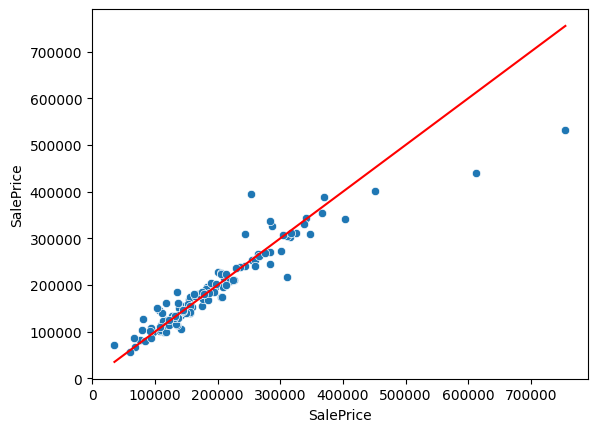

In [ ]:
plt.figure()
sns.scatterplot(x=y_test,y=predict)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.show()

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,predict))
mae=mean_absolute_error(y_test,predict)
r2=r2_score(y_test,predict)
print(rmse,mae,r2)

32671.519727774445 16385.450399800684 0.8831705939719647


##Saving this model

In [ ]:
import joblib
joblib.dump(rf_model,'the_model.joblib')

['the_model.joblib']

##Test using this model

In [ ]:
model=joblib.load('the_model.joblib')

In [ ]:
model.predict(X_train.iloc[:3])

array([236330.65080525, 191924.17556706, 131494.27048177])

In [ ]:
y_train.iloc[:3]

,SalePrice
907,250000
782,187100
952,133900


Above confirm the prediction result is pretty good on train data.

In [ ]:
X_train.iloc[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,SaleType,SaleCondition,BuildingSF,HouseBin,RemodYrSold,QualGrLiv,RatioBedroom,Neighborhood_HouseStyle
907,50,RL,86.0,11500,Pave,NONE,IR1,Lvl,AllPub,Inside,...,0,6,WD,Normal,3576,Old,19,14399,0.5,Crawfor_1.5Fin
782,20,RL,67.0,16285,Pave,NONE,IR2,Lvl,AllPub,Inside,...,0,6,WD,Normal,3481,New,7,10010,0.5,CollgCr_1Story
952,85,RL,60.0,7200,Pave,NONE,Reg,Lvl,AllPub,Inside,...,0,4,WD,Normal,2124,Middle-aged,6,3840,0.4,CollgCr_SFoyer


##Using this model for real

In [ ]:
# mau buat function
import pandas as pd
import numpy as np
test={
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
    }
df = pd.DataFrame(test)

In [ ]:
if isinstance(df,pd.DataFrame)==True:
  print(1)
else:
  print(0)

1


In [ ]:
import pandas as pd
import numpy as np
predict_this=pd.read_csv('test.csv')
predict_this.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
nonandata=predict_this.dropna()
nonandata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [ ]:
#untuk keperluan test request api
predict_this.iloc[0]

,0
Id,1461
MSSubClass,20
MSZoning,RH
LotFrontage,80.0
LotArea,11622
...,...
MiscVal,0
MoSold,6
YrSold,2010
SaleType,WD


In [ ]:
api_test=predict_this.iloc[0].to_dict()
api_test

{'Id': 1461,
 'MSSubClass': 20,
 'MSZoning': 'RH',
 'LotFrontage': 80.0,
 'LotArea': 11622,
 'Street': 'Pave',
 'Alley': nan,
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'Utilities': 'AllPub',
 'LotConfig': 'Inside',
 'LandSlope': 'Gtl',
 'Neighborhood': 'NAmes',
 'Condition1': 'Feedr',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'OverallQual': 5,
 'OverallCond': 6,
 'YearBuilt': 1961,
 'YearRemodAdd': 1961,
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': nan,
 'MasVnrArea': 0.0,
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'CBlock',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Rec',
 'BsmtFinSF1': 468.0,
 'BsmtFinType2': 'LwQ',
 'BsmtFinSF2': 144.0,
 'BsmtUnfSF': 270.0,
 'TotalBsmtSF': 882.0,
 'Heating': 'GasA',
 'HeatingQC': 'TA',
 'CentralAir': 'Y',
 'Electrical': 'SBrkr',
 '1stFlrSF': 896,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 896,
 '

In [ ]:
predict_this.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# man_price=pd.DataFrame(price.drop(['Id','YearBuilt','YrSold','HouseAge','YearRemodAdd'],axis=1))#add manually
testbentar=predict_this[:2]
testbentar.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [ ]:
def feature_processing(data):
  if isinstance(data,pd.DataFrame)==True:
    X_transformed = data.copy()
    X_transformed['HouseAge'] = X_transformed['YrSold']-X_transformed['YearBuilt']
    X_transformed['BuildingSF']=X_transformed['TotalBsmtSF']+X_transformed['GrLivArea']+X_transformed['GarageArea']+X_transformed['WoodDeckSF']+X_transformed['OpenPorchSF']+ X_transformed['EnclosedPorch']	+X_transformed['3SsnPorch']	+ X_transformed['ScreenPorch']+X_transformed['PoolArea']
    bins=[0,10,20,50,100,float('inf')]
    labels=['New','Recent','Middle-aged','Old','Historic']
    X_transformed['HouseBin']=pd.cut(X_transformed['HouseAge'],bins=bins,labels=labels)
    X_transformed['RemodYrSold']=X_transformed['YrSold']-X_transformed['YearRemodAdd']
    X_transformed['QualGrLiv']=X_transformed['GrLivArea']*X_transformed['OverallQual']
    X_transformed['RatioBedroom']=X_transformed['BedroomAbvGr']/X_transformed['TotRmsAbvGrd']
    X_transformed['Neighborhood_HouseStyle']=X_transformed['Neighborhood']+'_'+X_transformed['HouseStyle']
    X_transformed=X_transformed.drop(['Id','YearBuilt','YrSold','HouseAge','YearRemodAdd'],axis=1)
    return X_transformed
  else:
    print(0)



In [ ]:
predict_this.iloc[0]

,0
Id,1461
MSSubClass,20
MSZoning,RH
LotFrontage,80.0
LotArea,11622
...,...
MiscVal,0
MoSold,6
YrSold,2010
SaleType,WD


In [ ]:
predict_this.iloc[:1].to_numpy()

array([[1461, 20, 'RH', 80.0, 11622, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
        'Inside', 'Gtl', 'NAmes', 'Feedr', 'Norm', '1Fam', '1Story', 5,
        6, 1961, 1961, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', nan,
        0.0, 'TA', 'TA', 'CBlock', 'TA', 'TA', 'No', 'Rec', 468.0, 'LwQ',
        144.0, 270.0, 882.0, 'GasA', 'TA', 'Y', 'SBrkr', 896, 0, 0, 896,
        0.0, 0.0, 1, 0, 2, 1, 'TA', 5, 'Typ', 0, nan, 'Attchd', 1961.0,
        'Unf', 1.0, 730.0, 'TA', 'TA', 'Y', 140, 0, 0, 0, 120, 0, nan,
        'MnPrv', nan, 0, 6, 2010, 'WD', 'Normal']], dtype=object)

In [ ]:
#test function untuk api
cth=feature_processing(predict_this.iloc[:1].to_numpy())
cth

0


In [ ]:
ready_data=feature_processing(testbentar)

In [ ]:
model.predict(ready_data)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 17, 32, 38, 39, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([132264.39202898, 163944.74746035])

#Applying to full test data, then confirm the result in Kaggle

In [ ]:
testcsv_prediction=model.predict(feature_processing(predict_this))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 5, 15, 16, 17, 21, 22, 23, 24, 25, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 44] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
testcsv_prediction

array([132264.39202898, 163944.74746035, 173819.07873568, ...,
       156165.91216747, 111950.85669658, 226000.4250573 ])

In [ ]:
final=pd.DataFrame(testcsv_prediction,columns=['SalePrice'],index=predict_this['Id'])
final

,SalePrice
Id,
1461,132264.392029
1462,163944.747460
1463,173819.078736
1464,180222.322038
1465,198516.278901
...,...
2915,89358.274918
2916,89326.062446
2917,156165.912167


In [ ]:
final.shape

(1459, 1)

In [ ]:
#export
final.to_csv('HousePrice prediction.csv')

Setelah submit ke kaggle, RMSE model ini sebesar 0.14757, rangking 2300 dari 4200 partisipan. Masih bisa diimprove lagi.

#NOTES

Maybe improving the model with remove outlier data on the target data
<br>
data imputer missing should be saved aka harus masuk ke pipeline